# Term Deposit Subscription Prediction 
A Portuguese banking institution has collected data about their clients and they now want to use this data to design their marketing campaigns for maximum profit. The product being sold is a term deposit (Fixed Deposit).
The classification goal is to predict if the client will subscribe a term deposit (variable y).

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import scipy
import warnings
warnings.filterwarnings('ignore')

#Classification Algorithms 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as m
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import roc_auc_score

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
sns.set(font_scale=1.5)
pd.options.mode.chained_assignment = None
data = pd.read_csv("D:/train.csv")
test = pd.read_csv("D:/test.csv")


print ("Rows     : " ,data.shape[0])
print ("Columns  : " ,data.shape[1])
print ("\nFeatures : \n" ,data.columns.tolist())
print ("\nMissing values :  ", data.isnull().sum().values.sum())
print ("\nUnique values :  \n",data.nunique())


values=data.columns.tolist()
print(values)

Rows     :  32978
Columns  :  22

Features : 
 ['id', 'age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']

Missing values :   0

Unique values :  
 id                32978
age                  78
job                  12
marital               4
education             8
default               3
housing               3
loan                  3
contact               2
month                10
day_of_week           5
duration           1466
campaign             41
pdays                27
previous              8
poutcome              3
emp.var.rate         10
cons.price.idx       26
cons.conf.idx        26
euribor3m           312
nr.employed          11
y                     2
dtype: int64
['id', 'age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration

In [3]:
data.head()

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,4,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,5,45,services,married,basic.9y,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


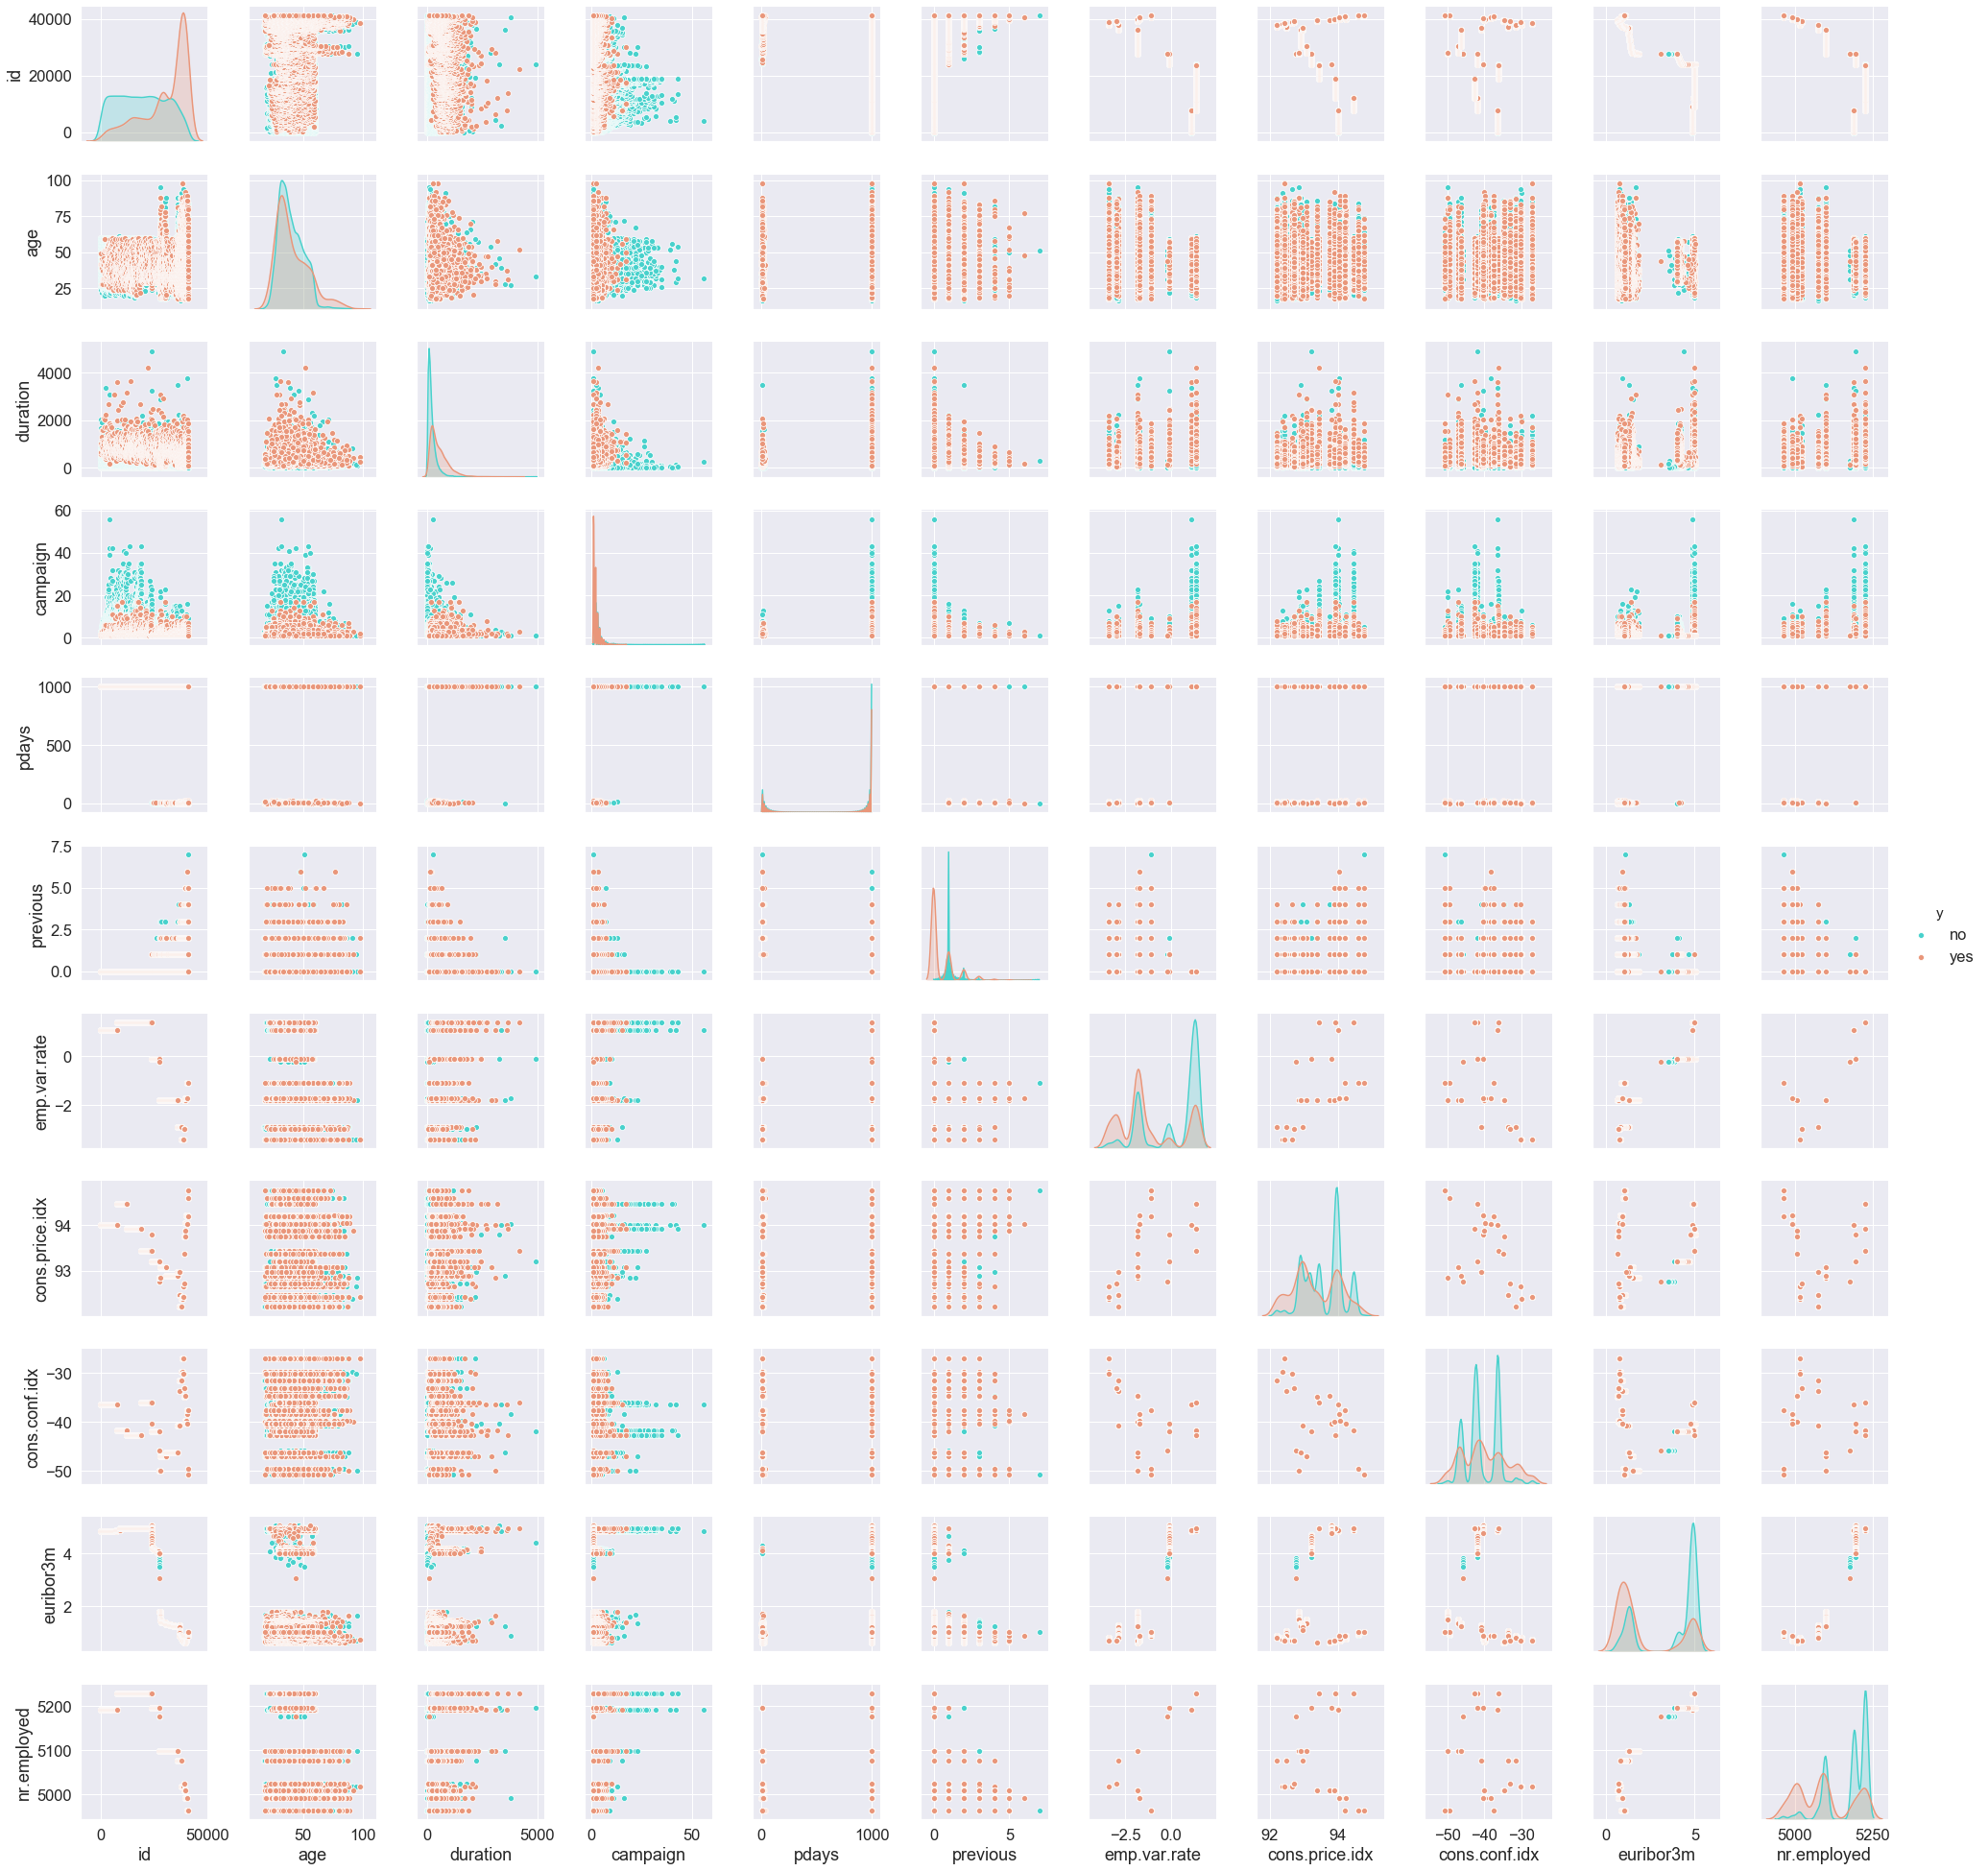

In [4]:
custom_palette = ["mediumturquoise","darksalmon"]
sns.set_palette(custom_palette)
sns.pairplot(data,hue='y')

We can observe that data here is not-symmetric. So lets find out the correlation matrix to look into details  

###  Correlation Matrix

In [5]:
data.corr()

,id,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
id,1.000000,0.009315,0.012047,-0.093459,-0.287313,0.429471,-0.834790,-0.736693,-0.255059,-0.850597,-0.758879
age,0.009315,1.000000,0.001263,0.000715,-0.034848,0.026278,-0.007852,-0.004784,0.132511,0.003155,-0.025980
duration,0.012047,0.001263,1.000000,-0.070409,-0.047158,0.021073,-0.030090,0.004247,-0.007163,-0.035528,-0.047981
campaign,-0.093459,0.000715,-0.070409,1.000000,0.052721,-0.078935,0.149358,0.126484,-0.010919,0.133766,0.142147
pdays,-0.287313,-0.034848,-0.047158,0.052721,1.000000,-0.590025,0.274546,0.081158,-0.096531,0.299990,0.376603
previous,0.429471,0.026278,0.021073,-0.078935,-0.590025,1.000000,-0.422505,-0.204047,-0.049461,-0.457056,-0.503786
emp.var.rate,-0.834790,-0.007852,-0.030090,0.149358,0.274546,-0.422505,1.000000,0.774856,0.195523,0.972141,0.906597
cons.price.idx,-0.736693,-0.004784,0.004247,0.126484,0.081158,-0.204047,0.774856,1.000000,0.058065,0.687174,0.520690
cons.conf.idx,-0.255059,0.132511,-0.007163,-0.010919,-0.096531,-0.049461,0.195523,0.058065,1.000000,0.276537,0.099957
euribor3m,-0.850597,0.003155,-0.035528,0.133766,0.299990,-0.457056,0.972141,0.687174,0.276537,1.000000,0.945183


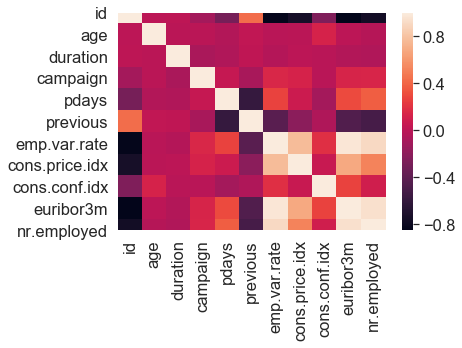

In [6]:
sns.heatmap(data.corr())

As per the pairplot, correlation matrix, and heatmap, observations as follow:

* Data is non-linear, asymmetric
* Hence selection of features will not depend upon correlation factor.
* Also not a single feature is correlated completely with class, hence requires combinantion of features.

# Plotting categorical variables

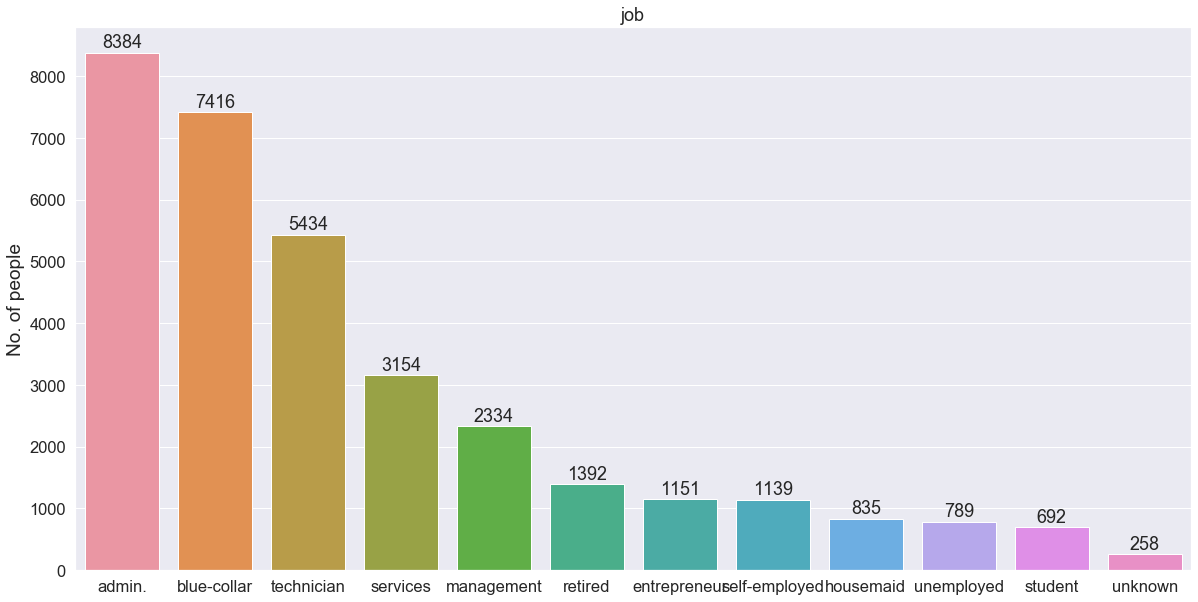

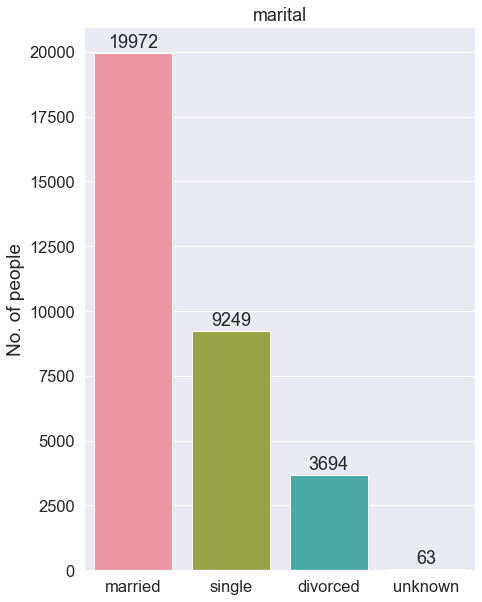

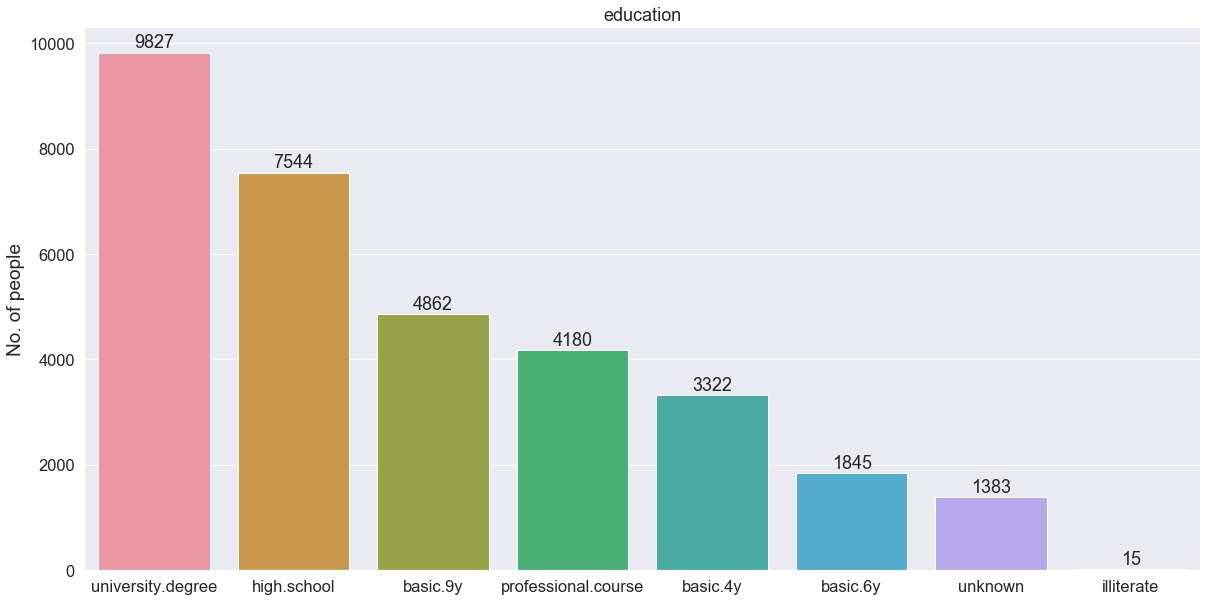

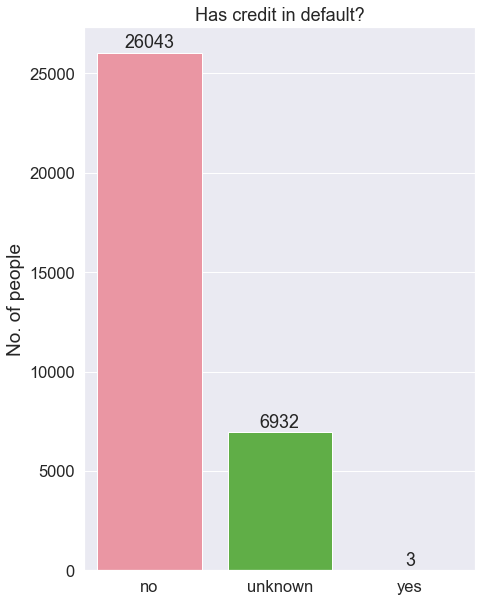

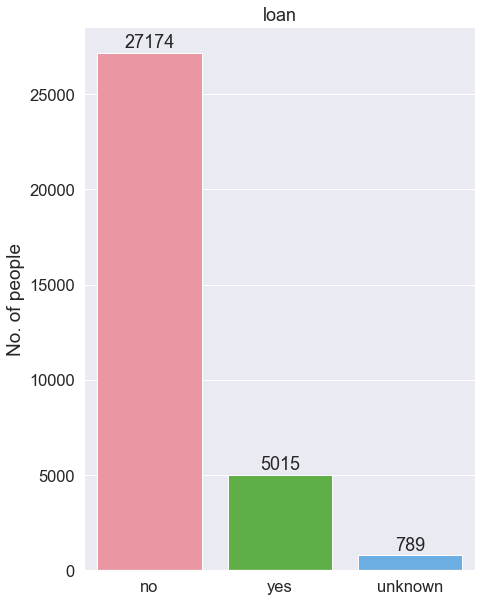

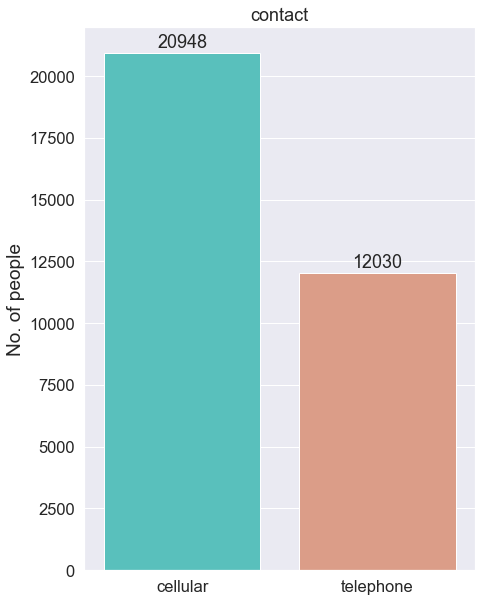

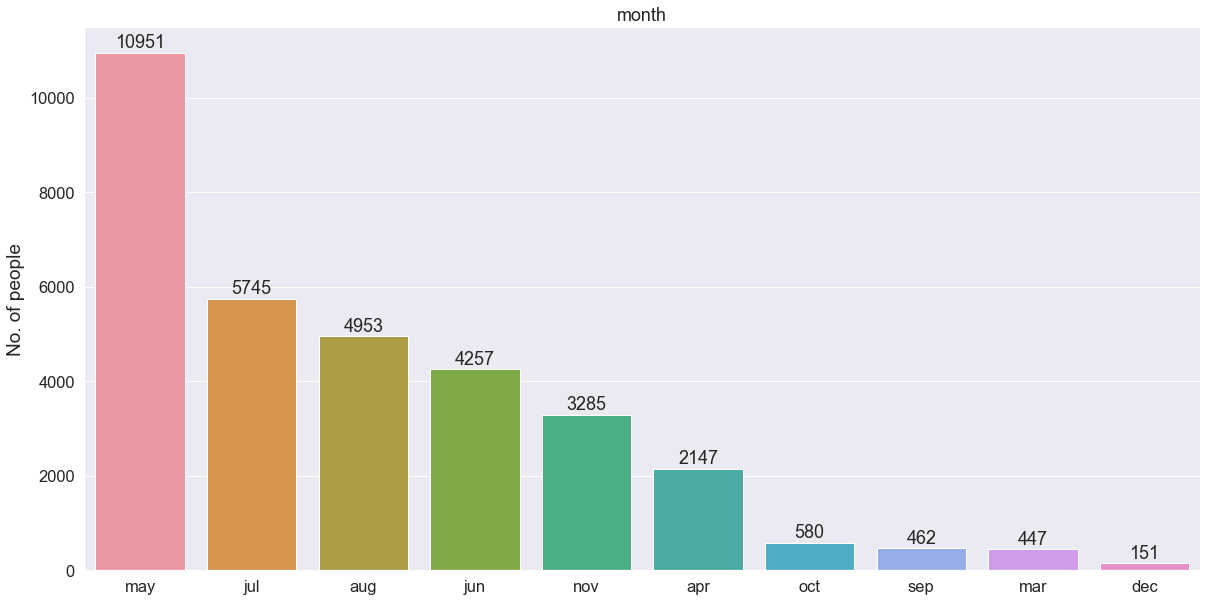

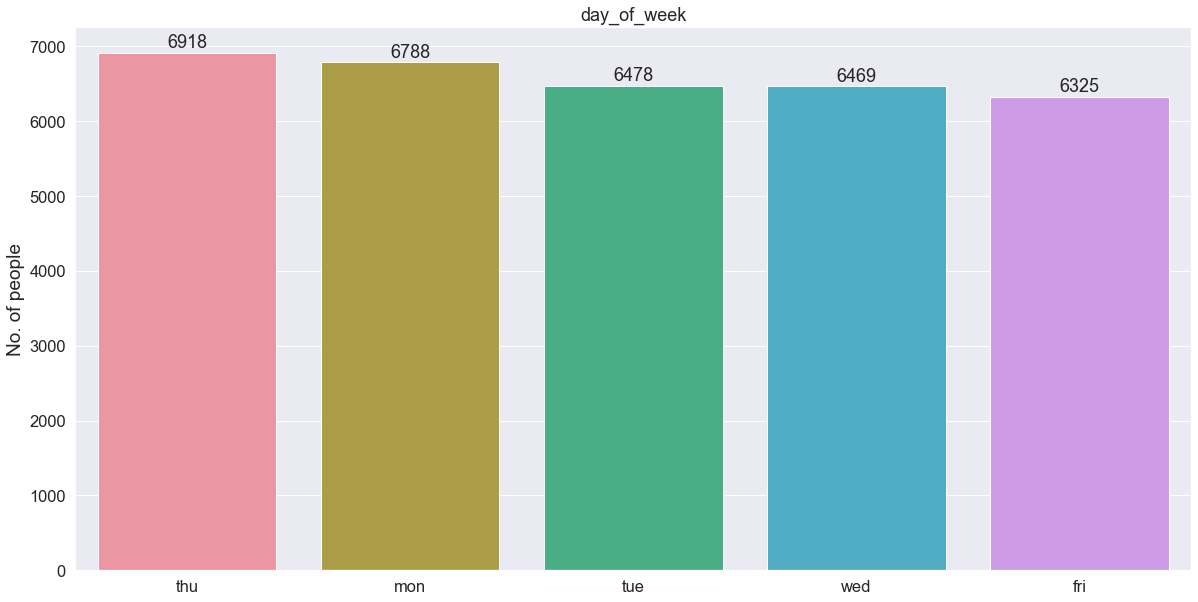

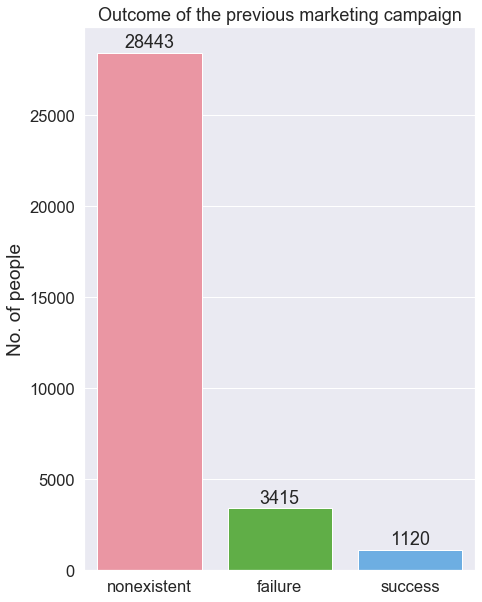

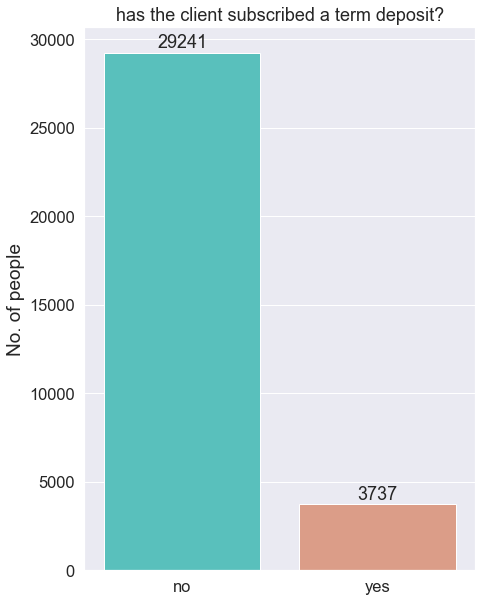

In [7]:
#VARIABLES AND RELATIONS
variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day_of_week', 'poutcome','y']
for col in variables:
    if(data[col].nunique()>4):
        plt.figure(figsize=(20,10))
    else:
        plt.figure(figsize=(7,10))
    
   
    x=sns.countplot(x=col,data=data,order = data[col].value_counts().index)
    if(col=='y'):
        plt.title('has the client subscribed a term deposit?')
    elif(col=='default'):
        plt.title('Has credit in default?')
    elif(col=='poutcome'):
        plt.title('Outcome of the previous marketing campaign')
    
    else:
        plt.title(col)
    
    for z in x.patches:
        x.annotate(format(z.get_height(), '.0f'), (z.get_x() + z.get_width() / 2., z.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
    plt.ylabel("No. of people",fontsize=19)
    plt.xlabel("")

**Conclusion**: It can be observed from the above countplots that a lot of categories have the value _unknown_. These are nothing but missing values and thus, need to be handled before we proceed further. 
    
We can't discard the all data containing the parameter _unknown_ since we'll lose quite a lot of data (Eg: **_default_** has 6932 entries that are unknown)  
However, we can predict the value of _unknown_ from rows which do not have missing values (by imputation)

From this information, we see this is an imbalanced class problem. There are far more people who haven't subscribed to the term than those who have. 

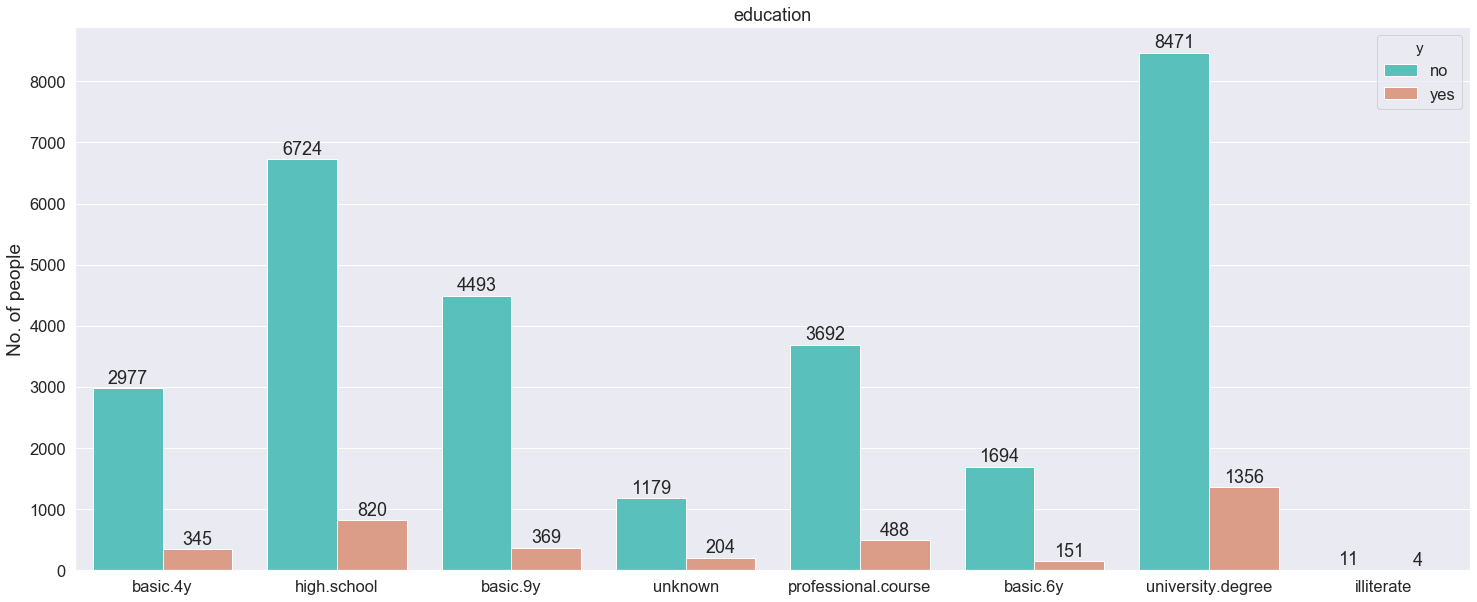

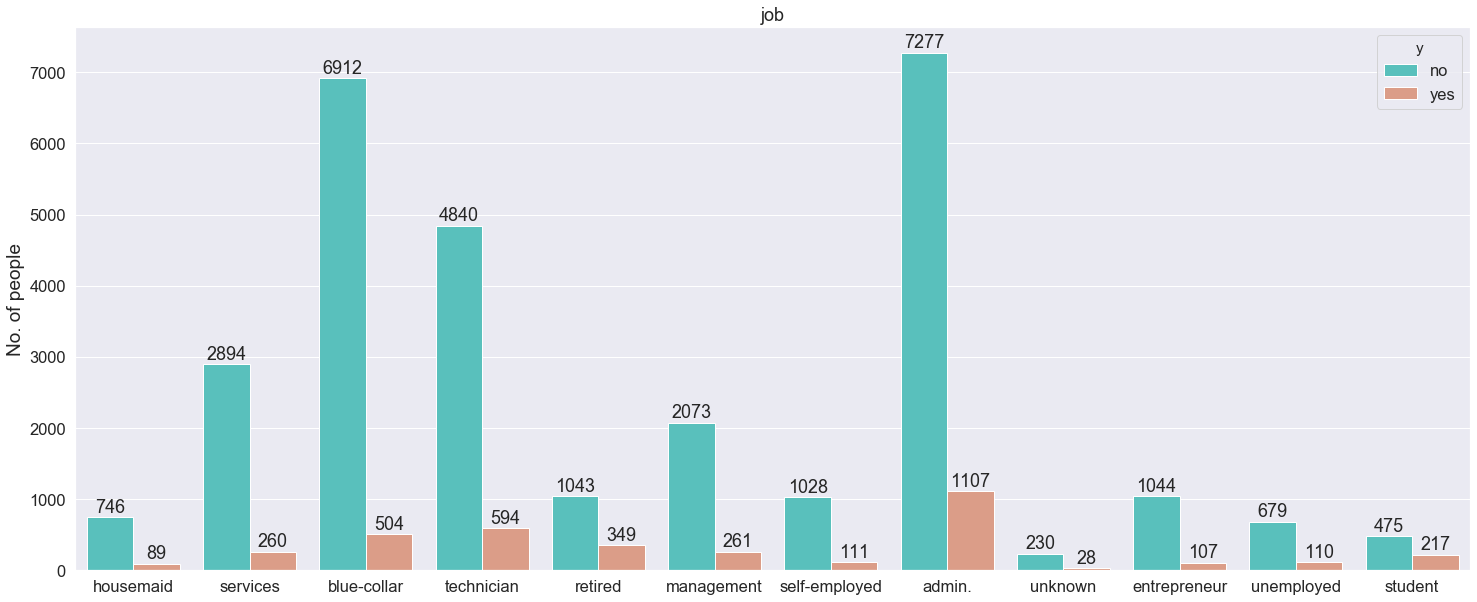

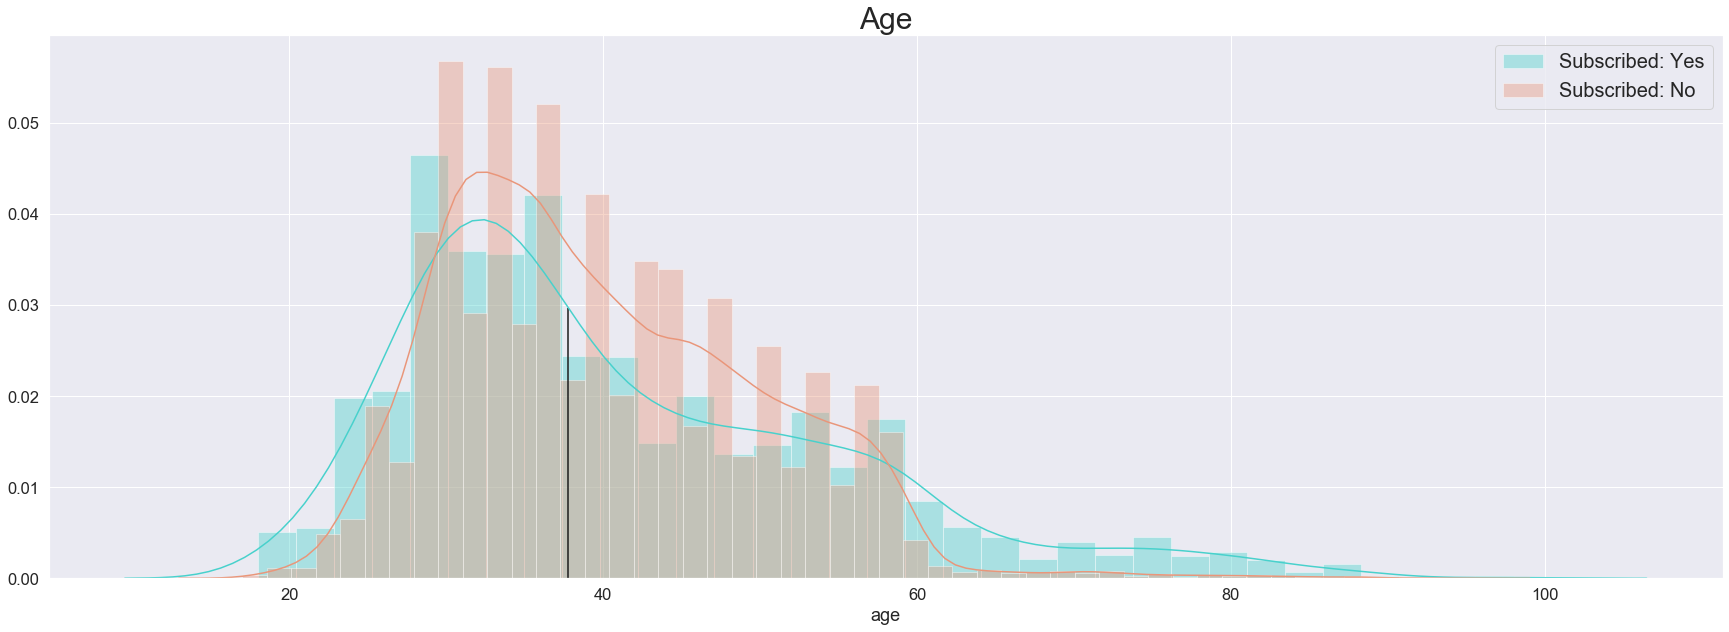

In [8]:
def plot_data(df,key):
    plt.figure(figsize=(25,10))
    plt.title(key,fontsize=18)
    x=sns.countplot(x=key,data=df,hue="y")
    plt.ylabel("No. of people",fontsize=19)
    plt.xlabel("")
    for z in x.patches:
            x.annotate(format(z.get_height(), '.0f'), (z.get_x() + z.get_width() / 2., z.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plot_data(data,'education')
plot_data(data,'job')


target_0 = data.loc[data['y'] == 'yes']
target_1 = data.loc[data['y'] == 'no']


def hist(c,no_c,title):
    plt.figure(figsize=(30,10))
    plt.title(title,fontsize=30)


    m1=sns.distplot(c,label='Subscribed: Yes')
    m2=sns.distplot(no_c,label='Subscribed: No')
    plt.legend(fontsize=20)
    
    #function for median
    x,y = m1.get_lines()[0].get_data()
    cdf = scipy.integrate.cumtrapz(y, x, initial=0)
    
    nearest_05 = np.abs(cdf-0.5).argmin()
    x_median = x[nearest_05]
    y_median = y[nearest_05]
    plt.vlines(x_median, 0, y_median)
    plt.show()

hist(target_0['age'],target_1['age'],"Age") 


* Most of our data is in between age 20 to 60 with median being around 38

# Plotting Numerical Variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F0F51FDD08>,
      dtype=object)

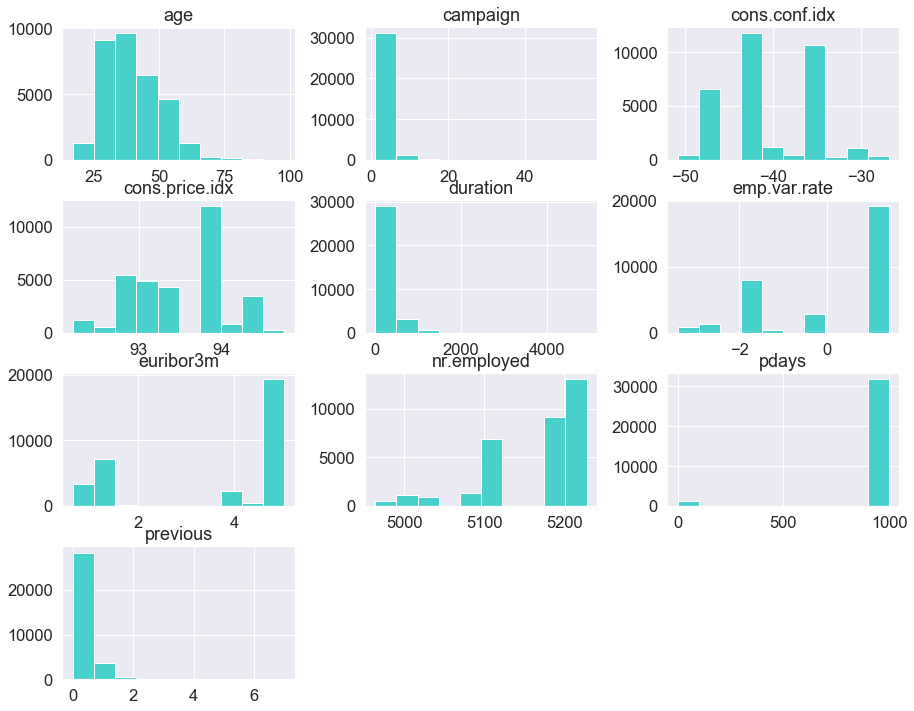

In [9]:
del data['id']
# plotting histogram for numerical attributes: 
numerical_attributes=data.select_dtypes(include=['int64','float64'])
numerical_attributes.hist(figsize=(15,12))

# Imputation 

We'll use cross tabulation for job and education since they are possibly related

In [10]:
data['job'][data['age']>60].value_counts()

retired          553
housemaid         44
admin.            40
technician        26
management        24
unknown           19
blue-collar       18
self-employed      8
entrepreneur       6
unemployed         6
services           2
Name: job, dtype: int64

We see that if the customer's age is greater than 60, then they are likely to be retired

In [11]:
def cross_tab(df,f1,f2):
    jobs=list(df[f1].unique())
    edu=list(df[f2].unique())
    dataframes=[]
    for e in edu:
        dfe=df[df[f2]==e]
        dfejob=dfe.groupby(f1).count()[f2]
        dataframes.append(dfejob)
    xx=pd.concat(dataframes,axis=1)
    xx.columns=edu
    xx=xx.fillna(0)
    return xx


In [12]:
cross_tab(data,'job','education')

,basic.4y,high.school,basic.9y,unknown,professional.course,basic.6y,university.degree,illiterate
admin.,66,2644,409,215,282,122,4645,1.0
blue-collar,1855,718,2917,343,352,1146,79,6.0
entrepreneur,116,177,162,47,105,58,484,2.0
housemaid,359,143,77,35,49,59,112,1.0
management,79,239,129,96,66,75,1650,0.0
retired,482,217,118,84,196,63,229,3.0
self-employed,72,92,176,20,131,22,624,2.0
services,108,2113,314,117,183,176,143,0.0
student,16,278,81,135,32,12,138,0.0
technician,52,701,316,171,2652,70,1472,0.0



_**If job is known**_ :  
* job='management' implies education='university.degree'
* job='services' implies education='high.school'
* job='housemaid' implies education='basic.4y'

_**If education is known**_ :  
* education='professional.course' implies job='technician'
* education='basic.4y' or 'basic.6y' or 'basic'9y' implies job='blue-collar'

In [13]:
data.loc[(data['age']>60) & (data['job']=='unknown'), 'job'] = 'retired'
data.loc[(data['education']=='unknown') & (data['job']=='management'), 'education'] = 'university.degree'
data.loc[(data['education']=='unknown') & (data['job']=='services'), 'education'] = 'high.school'
data.loc[(data['education']=='unknown') & (data['job']=='housemaid'), 'education'] = 'basic.4y'
data.loc[(data['job'] == 'unknown') & (data['education']=='basic.4y'), 'job'] = 'blue-collar'
data.loc[(data['job'] == 'unknown') & (data['education']=='basic.6y'), 'job'] = 'blue-collar'
data.loc[(data['job'] == 'unknown') & (data['education']=='basic.9y'), 'job'] = 'blue-collar'
data.loc[(data['job']=='unknown') & (data['education']=='professional.course'), 'job'] = 'technician'

In [14]:
cross_tab(data,'job','education')

,basic.4y,high.school,basic.9y,unknown,professional.course,basic.6y,university.degree,illiterate
admin.,66.0,2644,409.0,215.0,282.0,122.0,4645,1.0
blue-collar,1891.0,718,2942.0,343.0,352.0,1164.0,79,6.0
entrepreneur,116.0,177,162.0,47.0,105.0,58.0,484,2.0
housemaid,394.0,143,77.0,0.0,49.0,59.0,112,1.0
management,79.0,239,129.0,0.0,66.0,75.0,1746,0.0
retired,485.0,217,118.0,97.0,198.0,63.0,230,3.0
self-employed,72.0,92,176.0,20.0,131.0,22.0,624,2.0
services,108.0,2230,314.0,0.0,183.0,176.0,143,0.0
student,16.0,278,81.0,135.0,32.0,12.0,138,0.0
technician,52.0,701,316.0,171.0,2660.0,70.0,1472,0.0


**Imputations for house and loan** : We are again using cross-tabulation between 'house' and 'job' and between 'loan' and 'job.' The hypothesis is that loan status (Yes or No) should be in the proportion of each job category. 

In [15]:
jobhousing=cross_tab(data,'job','housing')
jobloan=cross_tab(data,'job','loan')

def fillhousing(df,jobhousing):
    jobs=['housemaid','services','admin.','blue-collar','technician','retired','management','unemployed','self-employed','entrepreneur','student']
    house=["no","yes"]
    for j in jobs:
        ind=df[np.logical_and(np.array(df['housing']=='unknown'),np.array(df['job']==j))].index
        mask=np.random.rand(len(ind))<((jobhousing.loc[j]['no'])/(jobhousing.loc[j]['no']+jobhousing.loc[j]['yes']))
        ind1=ind[mask]
        ind2=ind[~mask]
        df.loc[ind1,"housing"]='no'
        df.loc[ind2,"housing"]='yes'
    return df

def fillloan(df,jobloan):
    jobs=['housemaid','services','admin.','blue-collar','technician','retired','management','unemployed','self-employed','entrepreneur','student']
    loan=["no","yes"]
    for j in jobs:
        ind=df[np.logical_and(np.array(df['loan']=='unknown'),np.array(df['job']==j))].index
        mask=np.random.rand(len(ind))<((jobloan.loc[j]['no'])/(jobloan.loc[j]['no']+jobloan.loc[j]['yes']))
        ind1=ind[mask]
        ind2=ind[~mask]
        df.loc[ind1,"loan"]='no'
        df.loc[ind2,"loan"]='yes'
    return df

In [16]:
data=fillhousing(data,jobhousing)
data=fillloan(data,jobloan)

In [17]:
numerical_variables = ['age','campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx','euribor3m',
                      'nr.employed']
data[numerical_variables].describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000
mean,40.042392,2.563376,961.752471,0.174480,0.079562,93.574961,-40.508163,3.618474,5166.942198
std,10.466038,2.770355,188.683048,0.497501,1.571342,0.579191,4.633056,1.735421,72.341606
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Unknown Values: They're are encoded as '999'. From the above table, it is clear that only 'pdays' has missing values. Moreover, a majority of the values for 'pdays' are missing.

In [18]:
data['pdays'].value_counts()

999    31741
3        355
6        338
4        101
2         53
7         51
9         46
12        45
10        45
5         37
13        27
11        23
1         20
15        19
14        17
8         15
0         13
16         9
17         6
18         6
22         3
19         2
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

Only 3.7% of the dataset has pdays not equal to 999, thus, we won't try to impute the 999s


# Encoding catagorical variables 

We'll use One-Hot Encoding technique to convert categorical variables to numerical variables so that they fit in our model

In [19]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [20]:
data_new = pd.get_dummies(data, columns=['job','marital',
                                         'education','default',
                                         'housing','loan',
                                         'contact','month','day_of_week',
                                         'poutcome'])

data_new.y.replace(('yes', 'no'), (1, 0), inplace=True)

In [21]:
test_new = pd.get_dummies(test, columns=['job','marital',
                                         'education','default',
                                         'housing','loan',
                                         'contact','month','day_of_week',
                                         'poutcome'])

In [22]:
print(data_new.dtypes)

age                     int64
duration                int64
campaign                int64
pdays                   int64
previous                int64
                        ...  
day_of_week_tue         uint8
day_of_week_wed         uint8
poutcome_failure        uint8
poutcome_nonexistent    uint8
poutcome_success        uint8
Length: 64, dtype: object


# Modeling 

Here, I'll compare all these classifiers 

1. Gradient Boosting
2. AdaBoosting
3. Logistics Regression
4. Random Forest Classifier
5. Linear Discriminant Analysis
6. K Nearest Neighbour
7. Decision Tree
8. Gaussian Naive Bayes 
9. Support Vector Classifier

In [23]:
from xgboost import XGBClassifier
classifiers = {
               'Adaptive Boosting Classifier':AdaBoostClassifier(),
               'Linear Discriminant Analysis':LinearDiscriminantAnalysis(),
               'Logistic Regression':LogisticRegression(),
               'Random Forest Classifier': RandomForestClassifier(),
               'K Nearest Neighbour':KNeighborsClassifier(8),
               'Decision Tree Classifier':DecisionTreeClassifier(),
               'Gaussian Naive Bayes Classifier':GaussianNB(),
               'Support Vector Classifier':SVC(),
               'Gradient Boosting Classifier':GradientBoostingClassifier(),
               }

data_new.shape

(32978, 64)

In [24]:
data_y = pd.DataFrame(data_new['y'])
data_X = data_new.drop(['y'], axis=1)

In [25]:
log_cols = ["Classifier", "Accuracy","Precision Score","Recall Score","F1-Score","roc-auc_Score"]
log = pd.DataFrame(columns=log_cols)

                        Classifier  Accuracy  Precision Score  Recall Score  \
0     Adaptive Boosting Classifier  0.903477         0.769080      0.687640   
0     Adaptive Boosting Classifier  0.905700         0.778006      0.690061   
0     Linear Discriminant Analysis  0.908530         0.777347      0.736007   
0     Linear Discriminant Analysis  0.904589         0.764180      0.740398   
0              Logistic Regression  0.909238         0.790803      0.699058   
0              Logistic Regression  0.907318         0.780757      0.703422   
0         Random Forest Classifier  0.906610         0.783100      0.687462   
0         Random Forest Classifier  0.902567         0.764241      0.692574   
0              K Nearest Neighbour  0.898524         0.777541      0.607429   
0              K Nearest Neighbour  0.897514         0.763046      0.617752   
0         Decision Tree Classifier  0.887204         0.719600      0.721647   
0         Decision Tree Classifier  0.886194        

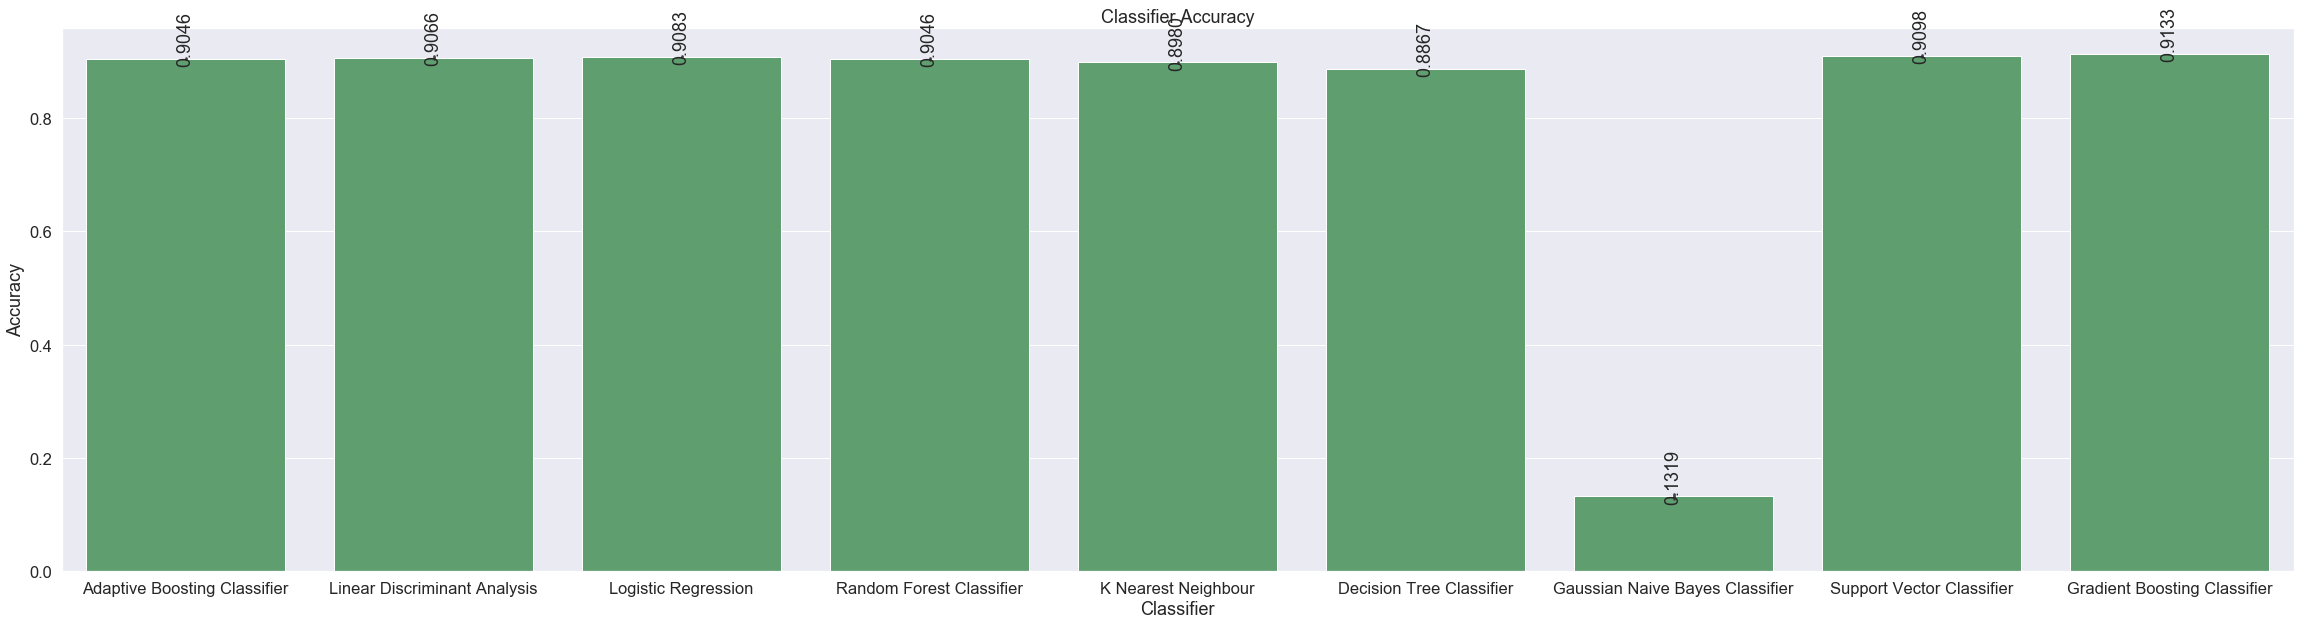

In [26]:
rs = StratifiedShuffleSplit(n_splits=2, test_size=0.3,random_state=2)
rs.get_n_splits(data_X,data_y)
for Name,classify in classifiers.items():
    for train_index, test_index in rs.split(data_X,data_y):
        X,X_test = data_X.iloc[train_index], data_X.iloc[test_index]
        y,y_test = data_y.iloc[train_index], data_y.iloc[test_index]
        #Scaling of Features 
        from sklearn.preprocessing import StandardScaler
        sc_X = StandardScaler()
        X = sc_X.fit_transform(X)
        X_test = sc_X.transform(X_test)
        cls = classify
        cls =cls.fit(X,y)
        y_out = cls.predict(X_test)
        accuracy = m.accuracy_score(y_test,y_out)
        precision = m.precision_score(y_test,y_out,average='macro')
        recall = m.recall_score(y_test,y_out,average='macro')
        roc_auc = roc_auc_score(y_out,y_test)
        f1_score = m.f1_score(y_test,y_out,average='macro')
        log_entry = pd.DataFrame([[Name,accuracy,precision,recall,f1_score,roc_auc]], columns=log_cols)
        log = log.append(log_entry)
    
        
print(log)
plt.figure(figsize=(40,10))
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')
ax=sns.barplot(y='Accuracy', x='Classifier', data=log, color="g")  
for p in ax.patches:
        ax.annotate("%.4f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='center', rotation=90, xytext=(0, 20), textcoords='offset points')
plt.show()

From comparing our classifiers on the test data (split from train), we see that:
* GradientBoostingClassifier is the best classifier 
* AdaptiveBoostingClassifier, LinearDiscriminantAnalysis, LogisticRegression, RandomForestClassifier, and    SupportVectorClassifier have quite similar outputs
* KNearestNeighbour and DecisionTreeClassifier come to a close third and fourth respectively
* Gaussian Naive Bayes Classifier performed the worst


We'll now run all these models on our given test data

Logistic Reg 0.907361 0.004841
K Neighbors 0.903760 0.005549
Decision Tree 0.888447 0.004874
Gaussian Naive Bayes 0.838072 0.003879
Adaptive Boosting Classifier 0.907626 0.004971
Linear Discriminant Analysis 0.907778 0.004028
Random Forest Classifier 0.908460 0.005637
Gradient Boosting Classifier 0.914677 0.003942


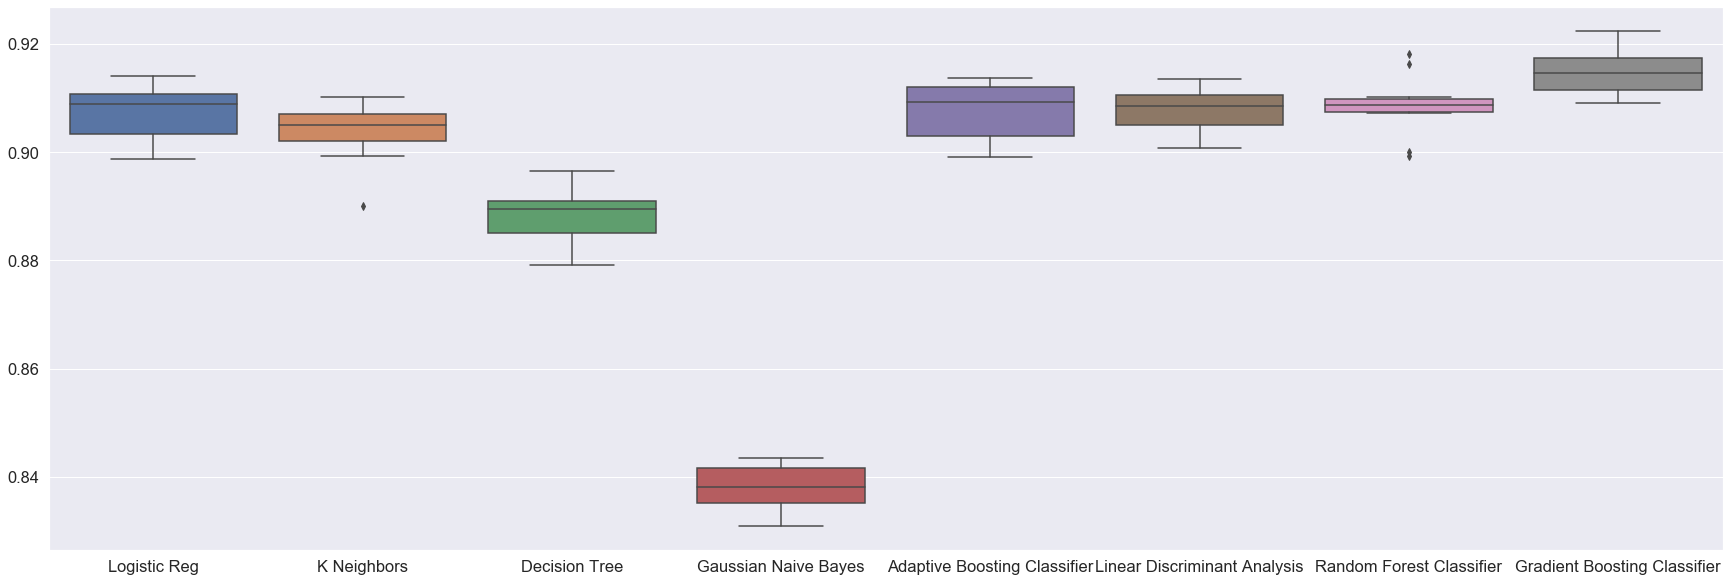

In [48]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
feature_col = ['age', 'job','marital', 'education','housing','loan', 'contact','duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx','euribor3m','nr.employed']
label_col = ['y']
#Didn't include SVC here as it's taking tremendous amount of time 
X_train, X_test, Y_train, Y_test = train_test_split(data[feature_col],data[label_col], test_size=0.2, random_state=52)
models = []
models.append(("Logistic Reg", LogisticRegression()))
models.append(("K Neighbors", KNeighborsClassifier()))
models.append(("Decision Tree", DecisionTreeClassifier()))
models.append(("Gaussian Naive Bayes", GaussianNB()))
models.append(("Adaptive Boosting Classifier",AdaBoostClassifier()))
models.append(("Linear Discriminant Analysis",LinearDiscriminantAnalysis()))
models.append(("Random Forest Classifier",RandomForestClassifier()))
models.append(("Gradient Boosting Classifier",GradientBoostingClassifier()))


num_folds = 10
seed = 7
scoring = 'accuracy'

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold,
                                 scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = f"{name} {cv_results.mean():f} {cv_results.std():f}"
    print(msg)

    
    
# Compare Algorithms
plt.figure(figsize=(30,10))
sns.boxplot(x=names, y=results)
plt.show()


In [27]:
#gradient boosting
from sklearn import svm
from xgboost import XGBClassifier
clf = GradientBoostingClassifier()
clf

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3, random_state=2, stratify=data_y)

clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [34]:
del test_new['id']
y_pred = clf.predict(test_new)

In [35]:
submission = pd.DataFrame()
submission['id'] = test['id']
submission['y'] = y_pred.reshape((y_pred.shape[0]))
submission.to_csv('sub.csv', index=False)

In [36]:
new_see=pd.read_csv("C:/Users/Mili/sub.csv")
new_see["y"] = new_see["y"].replace({1:"yes",0:"no"})

In [37]:
new_see.to_csv('trial.csv', index=False)

Similarily running all other models and submitting to Kaggle, this was the result:

1. GradientBoostingClassifier: 0.97279
1. SupportVectorClassifier: 0.97198
1. LogisticRegression: 0.96833
1. RandomForestClassifier: 0.96792
1. LinearDiscriminantAnalysis: 0.94194
1. AdaBoostClassifier: 0.93260
1. KNeighborsClassifier: 0.92082
1. DecisionTreeClassifier: 0.91920
1. GaussianNB: 0.89768